# Alex Dvorak, Project 2: Linear Regression, July 16, 2021

In [1]:
#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# General Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Preprocessing Modules
from sklearn.preprocessing import MinMaxScaler

# Model Building Modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Feature Selection Modules
from sklearn.feature_selection import SelectKBest, f_regression

## Problem definition, questions to be answered - Data background and contents
"As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it."  

**Problem definition:**  
Develop a linear regression model to predict the price of a used car. Evaluate the model. Look for improved models and reevaluate. Select the best model.  

**Questions:**  
- What features can be engineered to increase information?
- How many missing values are there and what are possible ways to handle them?
- What are the variable types?
- Which variables need to be processed in order to become the correct datatype?
- What are the variable distributions?
- Do the distributions make sense or is there bad data included?
- How do the variables relate to price?
- Which variables should be transformed to be more normal or to have a more linear relationship with price?
- Which variables contribute the most to the model? Can variables be removed?
- What is the predictive power of the model? Is it accurate enough for use in business?


**Data Background and Contents:**  
S.No. : Serial Number  
Name : Name of the car which includes Brand name and Model name  
Location : The location in which the car is being sold or is available for purchase Cities  
Year : Manufacturing year of the car  
Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.  
Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)  
Transmission : The type of transmission used by the car. (Automatic / Manual)  
Owner : Type of ownership  
Mileage : The standard mileage offered by the car company in kmpl or km/kg  
Engine : The displacement volume of the engine in CC.  
Power : The maximum power of the engine in bhp.  
Seats : The number of seats in the car.  
New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)  
Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)  

In [2]:
used_cars = pd.read_csv('used_cars_data.csv') # loading the dataset
used_cars.sample(10) # quick view of the dataset

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5839,5839,Ford Ikon 1.3 Flair,Chennai,2007,90000,Petrol,Manual,Second,13.8 kmpl,1299 CC,70 bhp,5.0,NaN,1.40
2697,2697,Tata Indigo LS,Pune,2006,160000,Diesel,Manual,First,17.0 kmpl,1405 CC,70 bhp,5.0,NaN,1.00
1096,1096,Mahindra XUV300 W8 Diesel,Chennai,2012,97000,Diesel,Manual,First,20.0 kmpl,1497 CC,115 bhp,5.0,12.79 Lakh,7.25
1554,1554,Maruti Ritz VXI,Hyderabad,2012,68776,Petrol,Manual,First,21.1 kmpl,1197 CC,85.80 bhp,5.0,NaN,3.90
6115,6115,Honda Accord 2.4 Elegance M/T,Kochi,2011,89219,Petrol,Manual,First,10.2 kmpl,2354 CC,180 bhp,5.0,NaN,NaN
819,819,BMW 3 Series 320d M Sport,Mumbai,2016,38000,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,NaN,23.99
5789,5789,Renault KWID RXL,Kochi,2019,7858,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,4.04 Lakh,3.80
1639,1639,Mercedes-Benz GL-Class 2007 2012 350 CDI Luxury,Delhi,2013,46000,Diesel,Automatic,First,12.0 kmpl,2987 CC,224 bhp,7.0,NaN,36.00
6992,6992,Volkswagen Polo 1.2 MPI Highline,Kochi,2018,28635,Petrol,Manual,First,16.2 kmpl,1199 CC,74 bhp,5.0,NaN,NaN
2548,2548,Chevrolet Beat LT,Kolkata,2010,30000,Petrol,Manual,First,18.6 kmpl,1199 CC,79.4 bhp,5.0,NaN,1.60


In [3]:
used_cars.shape # how many rows and columns?

(7253, 14)

In [4]:
used_cars.duplicated().sum() # checking for duplicate rows

0

#### Quick Note about Columns:
S.No. can be dropped directly.  
If Name has too many unique values, then it needs to be reduced to components of the Name with fewer unique values.  
Mileage, Engine, Power, and New_Price all have strings when they should be numeric so they need to be processed.  
New_Price is missing a lot of values.  

In [5]:
del used_cars['S.No.'] #serial numbers can be dropped

In [6]:
used_cars.isnull().sum() # how many missing values are there?

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

### Notes on Missing Values:  
Most columns are not missing values.  
**Milage** is missing 2 values.  
> This can be handled by filling in the values based on the distribution. This is preferrable to dropping the rows. We need to preserve as many rows as we can because the dataset is not large. Although, if you dropped the missing values, you would only lose two rows.  

**Engine** and **Power** are both missing 46 values. **Seats** is missing 53 values.  
> These can be filled in. We need to check the distribution to determine the best measure for imputation.

> Even if all three of these columns were missing from a row, it would be preferrable to preserve the rows and impute them anyway. 

**New_Price** is missing 6247 values  
> The dataset only has 7253 rows so this column is missing too much data to fill in. The column will be dropped.

**Price** is missing 1234 values.  
> This is our dependent variable so we cannot fill in the data without compromising the evaluation. As we cannot obtain the ground values from any outside information, these rows must be dropped.  

Missing values will be treated after the bivariate analysis. The sensitivity of the treatment will be determined by the correlation strength with Price.

In [7]:
del used_cars['New_Price'] # dropping New_Price column, too many missing values
used_cars.dropna(axis=0, subset=['Price'], inplace=True) # only including rows with values for Price
used_cars.shape # should be 7253 - 1234 rows (6019 rows)

(6019, 12)

In [8]:
used_cars.isnull().sum() #checking again to see how milage, engine, power, and seats were affected

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [9]:
used_cars['Name'].nunique() # checking if there are too many unique values

1876

In [10]:
# Creating a new feature: Car Brand
brand_split = used_cars['Name'].str.split(' ') # separates the name by spaces into each word
car_brand = []
car_model = []
for item in brand_split:
    car_brand.append(item[0]) # adds the first word of each name into a list
    car_model.append(item[1]) # adds the second word of each name into a list

used_cars['Car_Brand'] = pd.Series(car_brand) # creates a new column called 'Car_Brand' from Name
used_cars['Car_Model'] = pd.Series(car_model) # creates a new column called 'Car_Model' from Name

print(used_cars['Car_Brand'].nunique()) # checking how manageable the category will be
print(used_cars['Car_Model'].nunique()) # checking how manageable the category will be
del used_cars['Name'] # deleting Name

31
212


In [11]:
used_cars.info() # what are the datatypes?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
 11  Car_Brand          6019 non-null   object 
 12  Car_Model          6019 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


### <u>DATATYPES</u>:  
Milage, Engine, and Power need to be processed before they can be changed to the correct datatype. They also need to be processed before the missing values can be filled in.  
> Milage and Power should become 'float' datatype.  

>Engine should become 'int64' datatype. However, Engine contains NaN values which are the float datatype so the series cannot be converted to int64 before handling the missing values.    

Car_Model, Car_Brand, Location, Fuel_Type, Transmission, and Owner_Type should be changed to a categorical variable.  

Seats could either be 'int64' or 'category.' We will make it int64, but treat it as categorical.  

In [12]:
def suffix_finder(column): # used to identify the suffixes in the columns in order to process the data and change the datatype
    """A column or list containing numerical characters followed by a suffix returns a list of suffixes used in the column."""
    suffix_list = [] # return list
    error_list =[] # list of data that the method cannot handle
    for item in column:
        if not item == item: # if the item is NaN, then it will skip it and move to the next item in the loop
            continue 
        flag=False # used to stop while loop in the case of an out-of-bounds index
        i = -1 # value is -1 to start at the end of the start
        while (flag==False) and (item[i].isdigit() == False): # flag stops 'index out of bounds' errors, then checks for digits
            i -= 1 # progresses backward through the string
            if i < -len(item): # handles cases when string index is out of bounds because no number was found
                if item not in error_list: # avoids printing duplicate errors
                    error_list.append(item) # these items are also included in the suffix list
                    print(f'You need to handle "{item}" manually. It has no numbers.')
                flag = True # breaks while loop
        i += 1 # this is so it will correctly grab the number of characters after finding the digit
        if (item[i:] not in suffix_list) & (i != 0): # checks for duplicates & avoids adding pure numbers to the suffix list
            suffix_list.append(item[i:]) # appends the suffix to the suffix list
    return suffix_list

### Processing Categorical Datatypes

In [13]:
categorical_columns = ['Car_Model', 'Car_Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'] #categorical variables
for col_name in categorical_columns: 
    used_cars[col_name] = used_cars[col_name].astype('category') # changing to category datatype to save memory
    print(used_cars[col_name].value_counts()) # quick look at category subsets
    print('\n')

Swift      353
City       270
i20        247
Verna      170
Innova     164
          ... 
Petra        1
Boxster      1
MUX          1
Montero      1
E            1
Name: Car_Model, Length: 212, dtype: int64


Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Lamborghini         1
Isuzu               1
Smart               1
Ambassador          1
Name: Car_Brand, dtype: int64


Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune

### Processing Mileage Datatype

In [14]:
used_cars['Mileage'] = used_cars['Mileage'].str.strip() # removing white spaces
suffix_finder(used_cars['Mileage']) # finding the suffixes

[' km/kg', ' kmpl']

In [15]:
electric = used_cars.groupby('Fuel_Type').get_group('Electric') # checking Mileage units in Electric Fuel Type
electric

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,Mahindra,E
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,Toyota,Prius


**Electric has no mileage because it has no fuel and accounts for all of the missing values in Mileage.**  
There is no good comparison in mileage for the electric cars and no good way to accurately fill in the missing data.  
Also, the electric car subset only contains two points which is not enough to predict a subset.  
However, I will preserve the rows and impute the median values.

#### Additional Notes for Processing Mileage:

One of the units is measured by distance/mass and the other unit is measured by distance/volume.  
In order to convert one unit to the other, we need to know the relationship between mass and volume (density).  
The density depends on the fuel type so the conversion rate from 'km/kg' to 'km/L' will vary.  
It appears that 'km/L' (or kmpl) is the more common unit so we will convert 'km/kg' to 'km/L.'  
The unit conversion is:  
$\frac{km}{kg} * \frac{kg}{L} = \frac{km}{L}$

#### Fuel Density:
The fuel types are Petrol, Diesel, CNG, and LPG. 

Petrol: 0.737 kg/L
> Source: https://coolconversion.com/density-volume-mass/--1--liter--of--petrol--in--kg  

Diesel: 0.885 kg/L
> Source: https://coolconversion.com/density-volume-mass/  

CNG (Compressed Natural Gas): 0.128 kg/L
> (128.2 kg/m^3) Source: https://www.aqua-calc.com/page/density-table/substance/compressed-blank-natural-blank-gas  

LPG (Liquefied Petroleum Gas): 0.51 kg/L
> Source: https://www.elgas.com.au/blog/389-lpg-conversions-kg-litres-mj-kwh-and-m3/

In [16]:
def mileage_processor(mileage, fuel_type):
    """ This will return the mileage as a float datatype with the units in kmpl."""
    rates = {'Diesel':0.885, 'Petrol':0.737, 'CNG':0.128, 'LPG':0.51} # rates are in units (kg/L)
    # recall the suffixes are [' km/kg', ' kmpl']
    new_mileage = [] # return list
    indexer = -1 # starts at -1 so the indexer can go to 0 in the first loop and be at the front of the loop 
    for m in mileage: # handles all elements in mileage
        indexer += 1 # used to match the correct fuel type for each element in mileage
        if isinstance(m, str): # for strings
            if m.endswith(' kmpl'): # for data with units km/L
                new_mileage.append(float(m.replace(' kmpl',''))) # removes suffix and converts to float
            elif m.endswith(' km/kg'): # redundant evaluation for processing safety reasons
                new_mileage.append(float(m.replace(' km/kg',''))*rates[fuel_type[indexer]]) #removes suffix, converts to float, and multiplies by the correct rate
            else: # this will handle any unexpected cases
                print('Something unexpected happened.')
                new_mileage.append(1000.0) # this is a place holder to be replaced by the median
        else: # for null case
            new_mileage.append(1000.0) #this is a place holder to be replaced by the median
        
    return new_mileage   

used_cars['Mileage'] = mileage_processor(used_cars['Mileage'], used_cars['Fuel_Type'])
used_cars['Mileage'] = used_cars['Mileage'].replace(1000, used_cars['Mileage'].median())
    # the median could not be calculated until the string datatype was converted to float
    # the place holder value of 1000 can now be replaced with the median value

### Processing Power Datatype

In [17]:
used_cars['Power'] = used_cars['Power'].str.strip() # removes whitespaces
suffix_finder(used_cars['Power']) # returns a list of suffixes

You need to handle "null bhp" manually. It has no numbers.


[' bhp', 'null bhp']

In [18]:
def power_to_float(str_data): # defining a function to convert a string to a float
    if isinstance(str_data, str): # checks for strings, excludes floats (such as np.nan)
        return float(str_data.replace(' bhp','')) # removes the suffix and converts to float
    else: # handles null cases
        return np.nan
used_cars['Power'] = used_cars['Power'].replace('null bhp', np.nan) # handles the string 'null bhp'
used_cars['Power'] = used_cars['Power'].apply(power_to_float) # removes the suffix and changes to float

### Processing Engine Datatype

In [19]:
used_cars['Engine'] = used_cars['Engine'].str.strip() # removes whitespaces
suffix_finder(used_cars['Engine']) # returns a list of suffixes

[' CC']

In [20]:
def engine_to_float(str_data): # defining a function to convert a string to a float
    if isinstance(str_data, str): # checks for strings, excludes floats (such as np.nan)
        return float(str_data.replace(' CC','')) # removes the suffix and converts to float
    else: # handles null cases
        return np.nan
    
used_cars['Engine'] = used_cars['Engine'].apply(engine_to_float) # removes the suffix and converts to float

In [21]:
used_cars.sample(5) # quick look at dataset

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model
4797,Chennai,2011,47000,Petrol,Manual,First,17.0,1197.0,80.00,5.0,4.50,Hyundai,i20
5409,Pune,2015,28700,Petrol,Manual,First,21.1,814.0,55.20,5.0,2.60,Hyundai,EON
786,Delhi,2013,70000,Diesel,Automatic,First,10.0,2148.0,170.00,5.0,15.80,Mercedes-Benz,E-Class
2379,Jaipur,2017,52000,Petrol,Manual,Second,21.1,814.0,55.20,5.0,3.50,Hyundai,EON
946,Bangalore,2013,132000,Diesel,Manual,First,13.5,2477.0,175.56,7.0,12.49,Mitsubishi,Pajero


In [22]:
used_cars.info() # double check all datatypes are correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             5983 non-null   float64 
 8   Power              5876 non-null   float64 
 9   Seats              5977 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Car_Brand          6019 non-null   category
 12  Car_Model          6019 non-null   category
dtypes: category(6), float64(5), int64(2)
memory usage: 591.4 KB


# Univariate Analysis

In [23]:
used_cars.describe().T # statistic summary of the numeric variables

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Mileage,6019.0,17.912919,4.718956,0.00,15.1,18.00,20.92,28.4
Engine,5983.0,1621.276450,601.355233,72.00,1198.0,1493.00,1984.00,5998.0
Power,5876.0,113.253050,53.874957,34.20,75.0,97.70,138.10,560.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [24]:
def univariate_num(column):
    """This function returns the box plot, histogram, and outlier count for features in the used_cars dataset. It is intended for numeric variables."""
    dist_figure, (boxplt, histplt) = plt.subplots(nrows=2, sharex=True, figsize=(12,8)) #creates subplots sharing the x-axis
    sns.boxplot(x=used_cars[column], ax=boxplt); # first subplot is a boxplot
    sns.histplot(used_cars[column], ax=histplt); # second subplot is a histogram
    histplt.axvline(used_cars[column].mean(), color='red', linestyle='-') # puts a line for the mean on the histogram
    histplt.axvline(used_cars[column].median(), color='black', linestyle='-') # puts a line for the median on the histogram
    
    q3 = np.percentile(used_cars[column], 75) # upper quartile
    q1 = np.percentile(used_cars[column], 25) # lower quarttile
    lower_outliers = used_cars[used_cars[column] < q1 - (q3-q1)*1.5] # calculates lower outliers
    upper_outliers = used_cars[used_cars[column] > q3 + (q3-q1)*1.5] # calculates upper outliers
    print(f'There are {lower_outliers.shape[0]} lower outliers and {upper_outliers.shape[0]} upper outliers.')
    
def univariate_cat(column):
    """This function return the count plot and value counts for features in the used_cars dataset. It is intended for categorical variables."""
    plt.figure(figsize=(12,8))
    sns.countplot(data = used_cars, x=column);
    plt.show()
    print(used_cars[column].value_counts())

There are 50 lower outliers and 0 upper outliers.


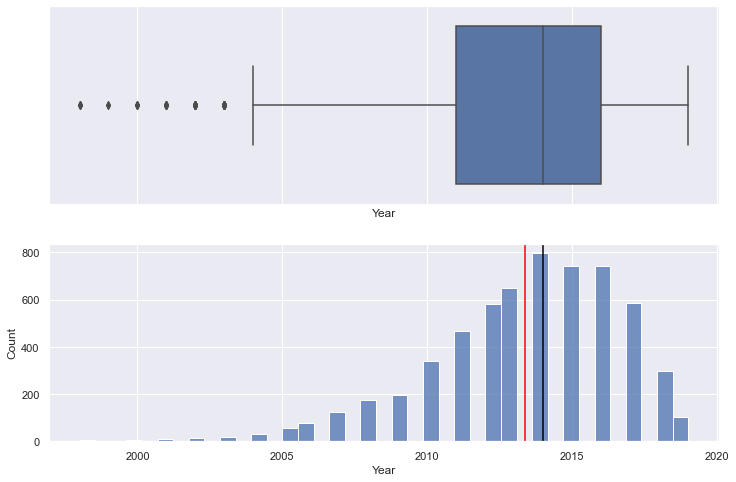

In [25]:
univariate_num('Year')

#### Notes for Year:
There is a fairly normal distribution. It is skewed a bit to the left with a few outliers, but nothing extreme.  

There are 0 lower outliers and 202 upper outliers.


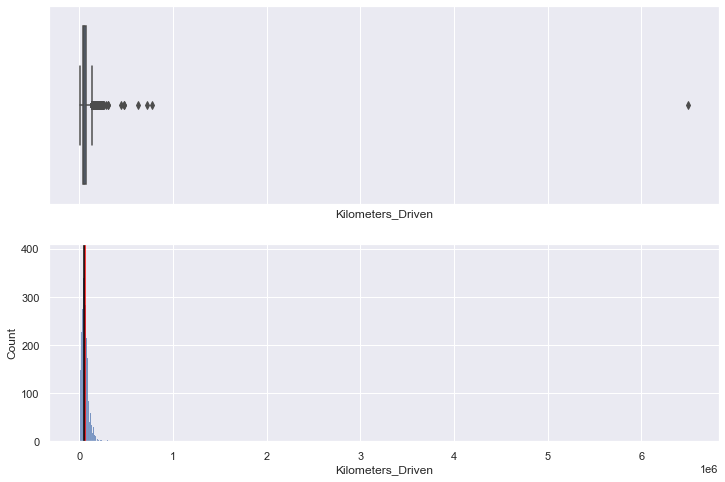

In [26]:
univariate_num('Kilometers_Driven')

There are 0 lower outliers and 201 upper outliers.


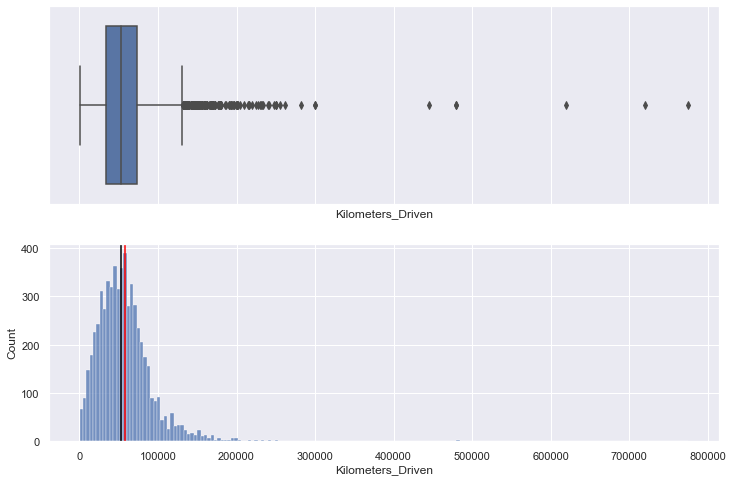

In [27]:
used_cars['Kilometers_Driven'] = used_cars['Kilometers_Driven'].replace(6500000, used_cars['Kilometers_Driven'].median())
    # we know it is 6500000 from the statistic summary data
univariate_num('Kilometers_Driven')

#### Notes for Kilometers Driven:  
There an outlier showing 6,500,000 kilometers driven. For reference, the circumference of the Earth at the equator is 40,000 kilometers. The data was entered incorrectly. I imputed the median value to the incorrect data.  

The new distribution is much closer to normal, but still with a long tail to the right due to outliers.

There are 124 lower outliers and 0 upper outliers.


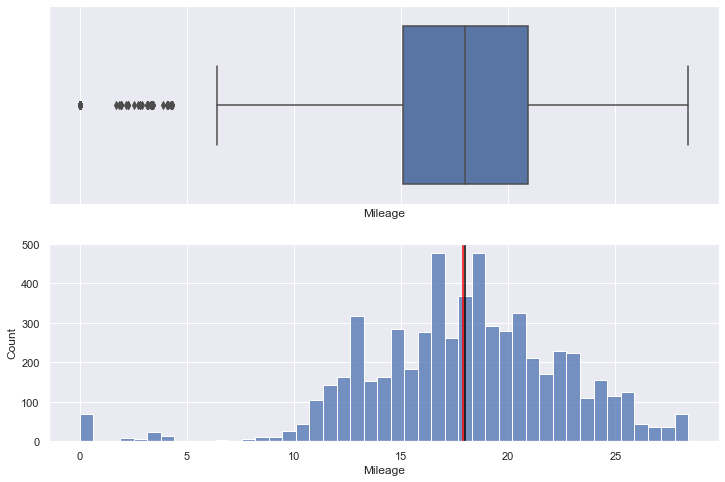

In [28]:
univariate_num('Mileage')

### Notes for Mileage
Some values are zero which is not possible so those will be handled in the missing values treatment.  
The distribution looks mostly normal for Mileage, though there are still a few outliers on the left side of the distribution.

There are 0 lower outliers and 0 upper outliers.


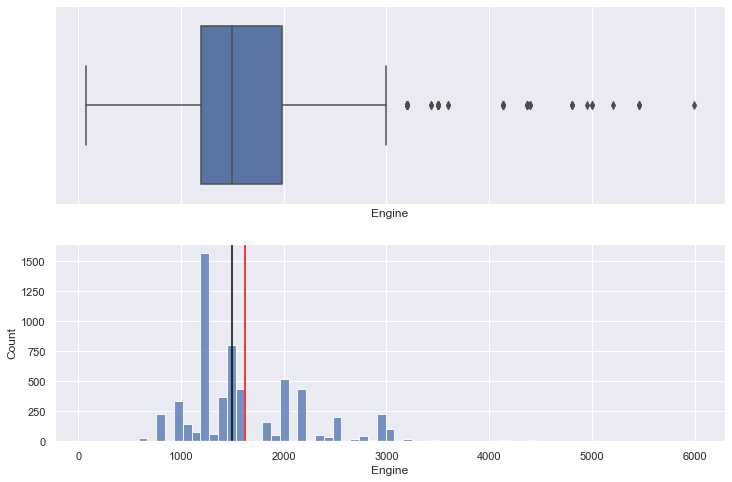

In [29]:
univariate_num('Engine')

### Notes for Engine

In the first view of the distribution, the upper outliers returned as 0 because there were still missing values.  
Looking at the box plot, there are several upper outliers. Looking at the histogram, there is a right skew with the mean higher than the median.  

There are 0 lower outliers and 0 upper outliers.


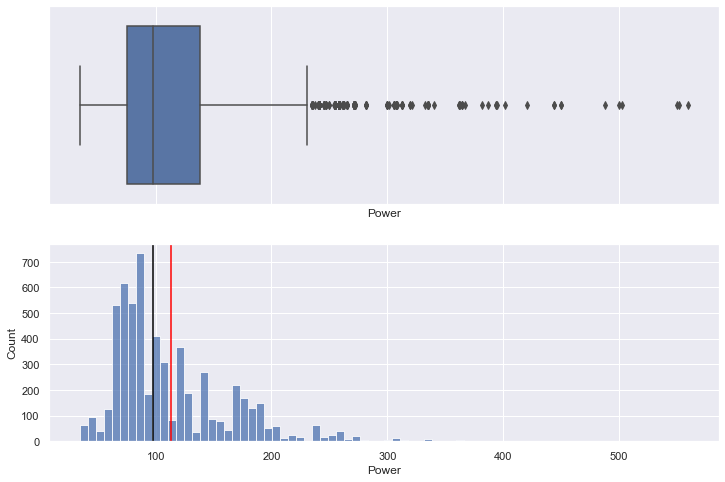

In [30]:
univariate_num('Power')

### Notes for Power

Again, we needed to treat the missing values before the outlier calculations would show.  
The distribution is skewed to the right.  

In [31]:
used_cars['Seats'].value_counts() # initial check for bad data

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

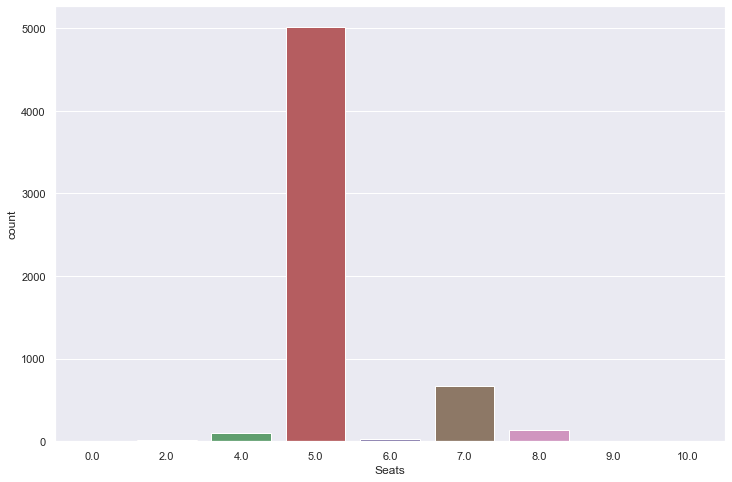

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64


In [32]:
univariate_cat('Seats') # univariate analysis for a categorical variable

### Notes for Seats
Because there are few unique values, this can be treated as a categorical variable.

In [33]:
used_cars.describe(include='category', exclude=['float', 'int']).T # statistic summary of the categorical variables

,count,unique,top,freq
Location,6019,11,Mumbai,790
Fuel_Type,6019,5,Diesel,3205
Transmission,6019,2,Manual,4299
Owner_Type,6019,4,First,4929
Car_Brand,6019,31,Maruti,1211
Car_Model,6019,212,Swift,353


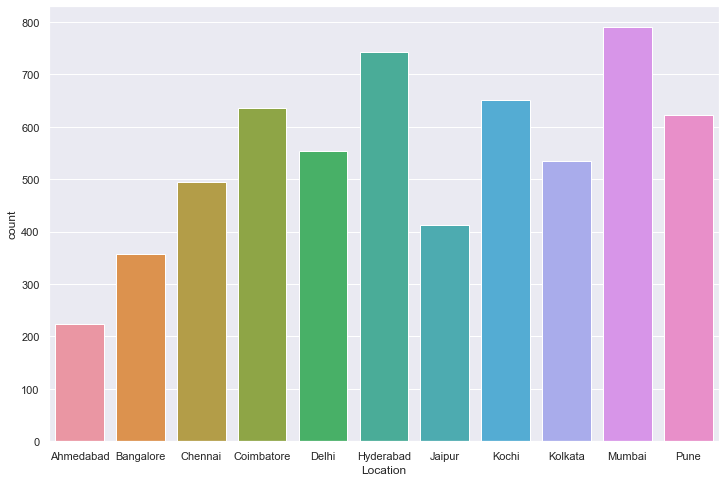

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64


In [34]:
univariate_cat('Location')

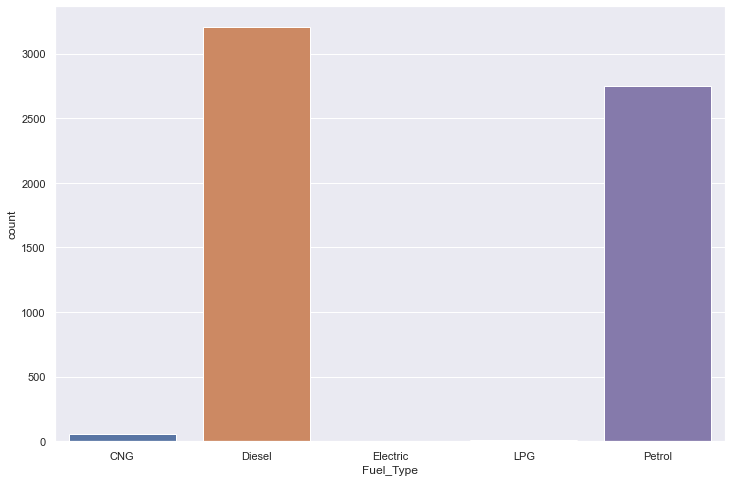

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64


In [35]:
univariate_cat('Fuel_Type')

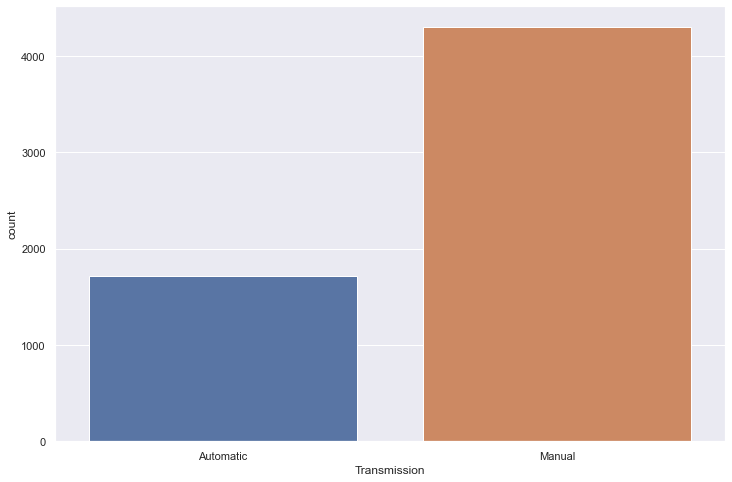

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64


In [36]:
univariate_cat('Transmission')

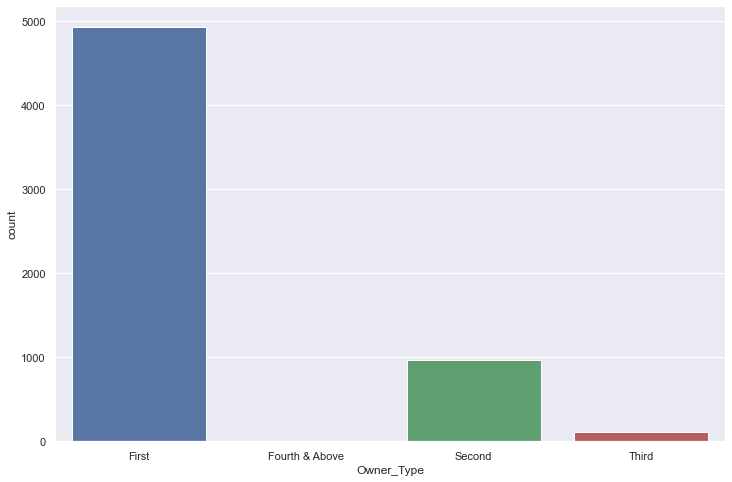

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64


In [37]:
univariate_cat('Owner_Type')

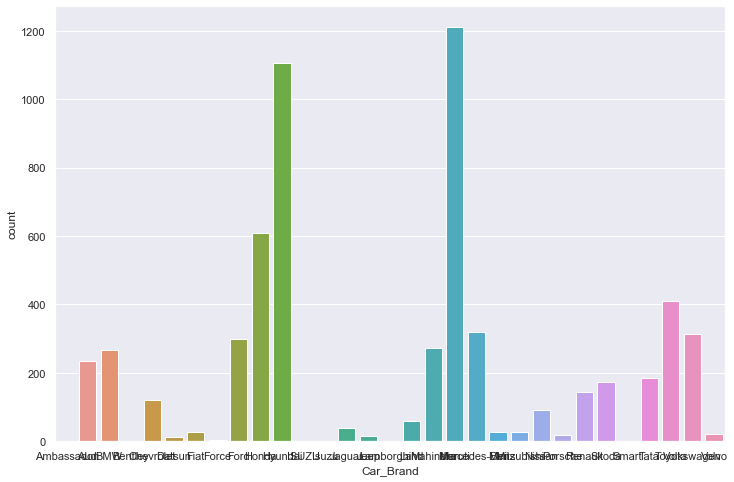

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Lamborghini         1
Isuzu               1
Smart               1
Ambassador          1
Name: Car_Brand, dtype: int64


In [38]:
univariate_cat('Car_Brand')

There are 0 lower outliers and 718 upper outliers.


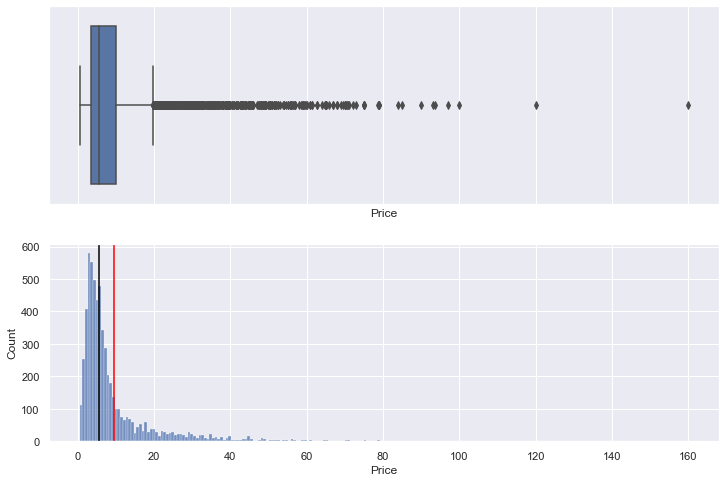

In [39]:
univariate_num('Price')

In [40]:
used_cars.info() # non-null count confirmation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6019 non-null   category
 1   Year               6019 non-null   int64   
 2   Kilometers_Driven  6019 non-null   int64   
 3   Fuel_Type          6019 non-null   category
 4   Transmission       6019 non-null   category
 5   Owner_Type         6019 non-null   category
 6   Mileage            6019 non-null   float64 
 7   Engine             5983 non-null   float64 
 8   Power              5876 non-null   float64 
 9   Seats              5977 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Car_Brand          6019 non-null   category
 12  Car_Model          6019 non-null   category
dtypes: category(6), float64(5), int64(2)
memory usage: 591.4 KB


# Bivariate Analysis

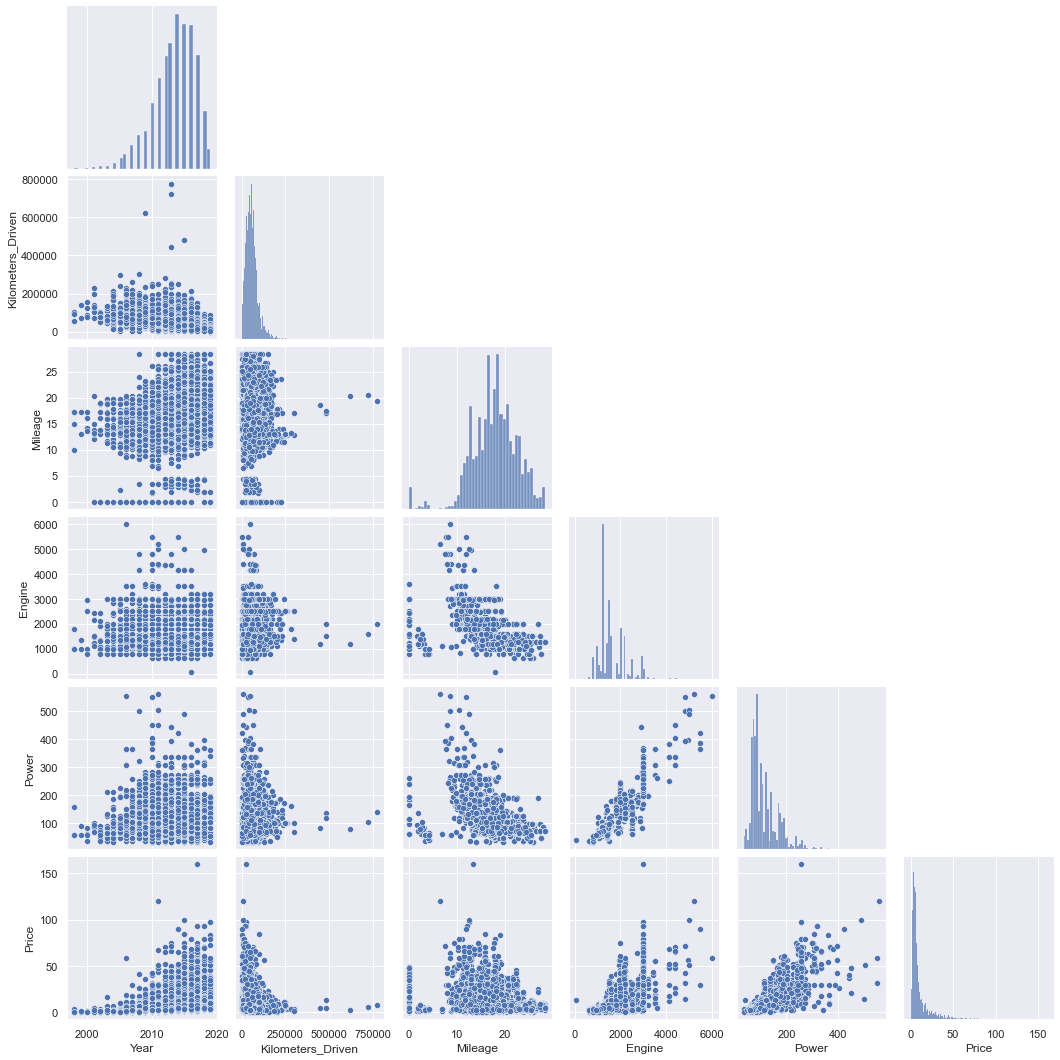

In [41]:
sns.pairplot(data = used_cars.drop('Seats',axis=1), corner=True); # pair plots excluding Seats

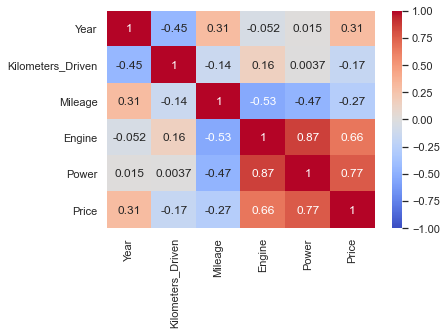

In [42]:
sns.heatmap(used_cars.drop('Seats',axis=1).corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1); 
    # Heatmap using correlation
    # Seats feature is temporarily dropped as it is being treated as a categorical variable

In [43]:
def bivariate_cat(column):
    """This function creates a boxplot comparing the Price to categorical variables."""
    plt.figure(figsize=(16,8)) # the figure will be longer than usual to fit more categories
    sns.boxplot(x=column, y='Price', data=used_cars); # categorical variable with respect to dependent variable
    plt.show()

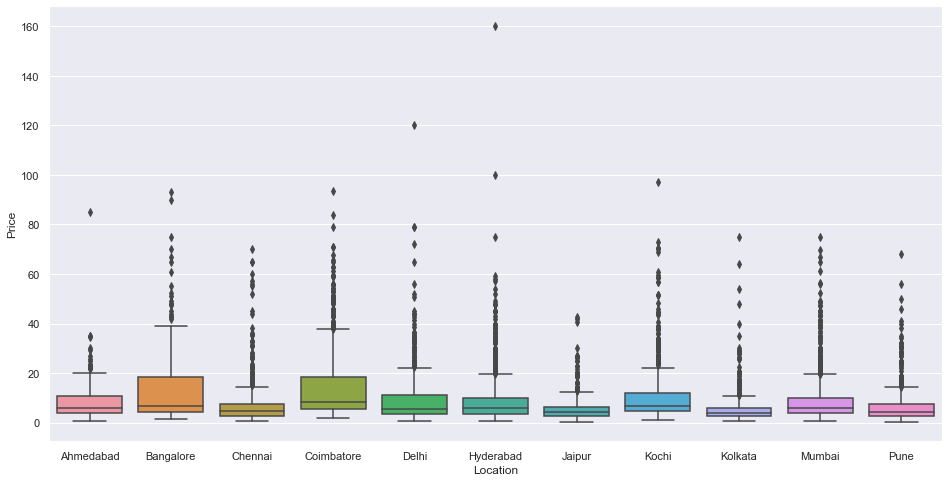

In [44]:
bivariate_cat('Location')

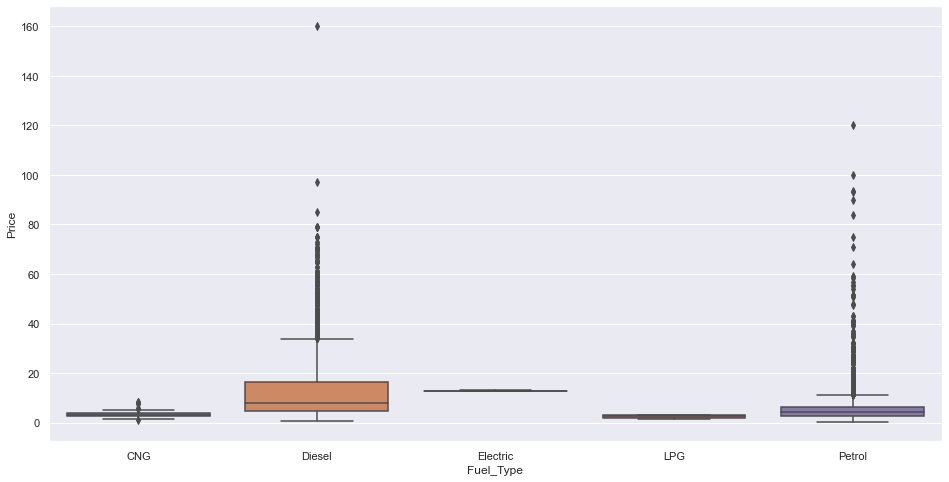

In [45]:
bivariate_cat('Fuel_Type')

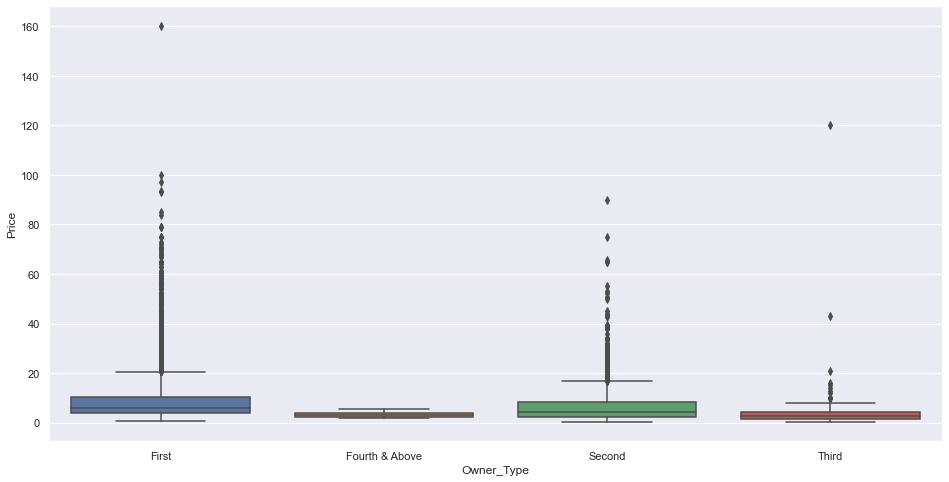

In [46]:
bivariate_cat('Owner_Type')

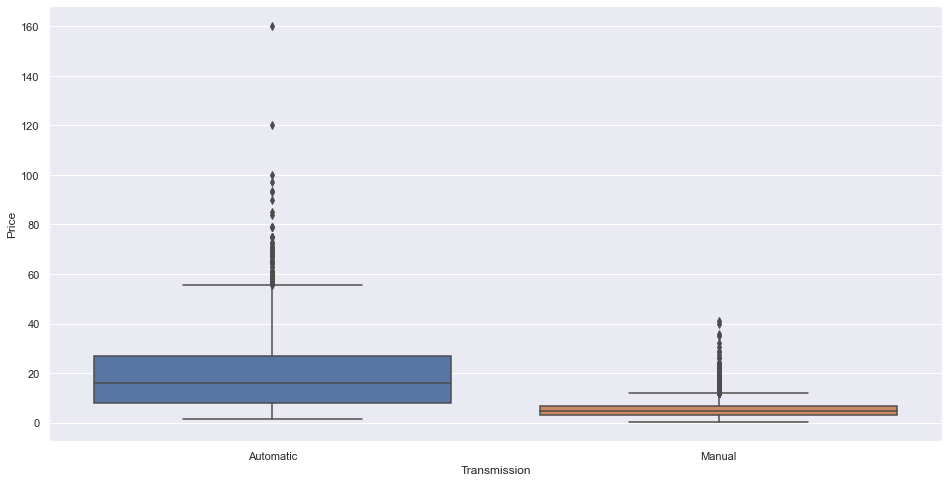

In [47]:
bivariate_cat('Transmission')

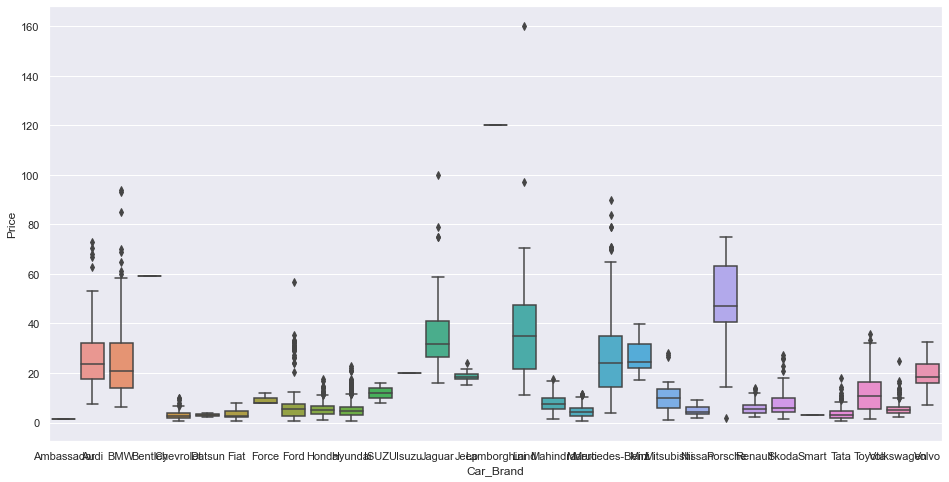

In [48]:
bivariate_cat('Car_Brand')

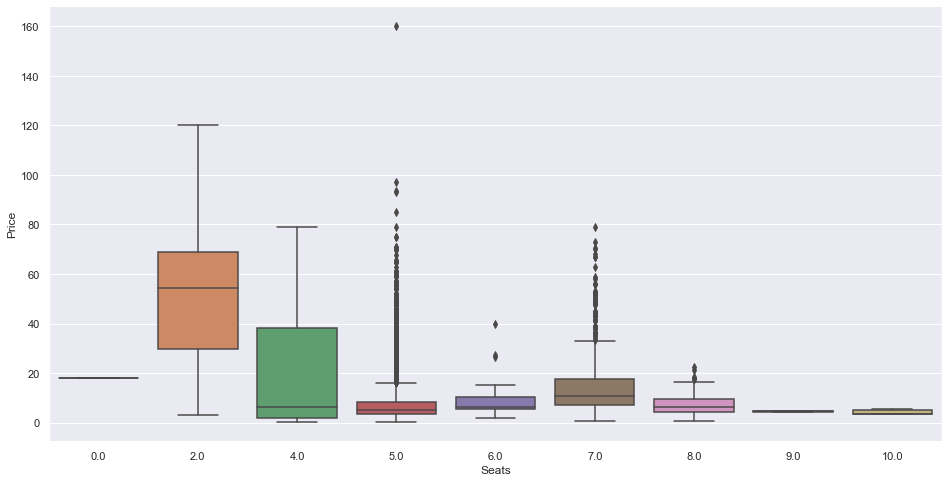

In [49]:
bivariate_cat('Seats')

## Bivariate Analysis Notes:

Enginer and Power have a strong correlation to each other. They both have fairly good correlation to Price.  
While Seats shows a low correction in the correlation map, that is not a good measure because it should be treated as a categorical variable. The boxplots with respect to Price show a general trend that fewer seats results in a higher price.  
Most of the categorical variables show variation with Price, though Location is mostly uniform in distribution for Price.

# Key Insights from EDA

Price does not have a normal distribution and has a large range making treating outliers tricky.    

Power and Engine are highly correlated. They both have heavy correlation to Price as well.  
> As Power/Engine increased, Mileage decreased (moderate negative correlation). Surprisingly, Mileage has a moderate negative correlation to Price. High mileage is a benefit so intuition would say that it would have some positive correlation. However, the negative relationship between Power/Engine and Mileage combined with the strong relationship between Power/Engine and Price outweighs any natural positive correlation that Mileage might have with Price.  

> The Kilometers_Driven had little impact on Power/Engine.  

Newer cars (Year) also tended to be higher in price, though the correlation is only moderate.  
> Kilometers_Driven has a moderate negative correlation with Year. This corresponds well to a weak negative correction between Kilometers_Driven and Price.  

More seats and more owners tend to result in lower prices.  

Location seemed to have very limited correlation with Price as most distributions across Locations were similar.  

It is difficult to say definitively with so few data points in the categories of Fuel_Type, but it seems like only Diesel and Petrol cars have high prices.  

Automatic transmissions generally have a higher price than manual transmissions.  

Some brands heavily affect the price. The others could probably just be treated as default values.  

# Missing Value Treatment

In [50]:
used_cars['Mileage'] = used_cars['Mileage'].replace(0, used_cars['Mileage'].mean())
    # replacing the zeros with the mean, mean chosen for normal distribution and few outliers
    
used_cars['Seats'] = used_cars['Seats'].replace(np.nan, 5).replace(0, 5)
    # missing values treatment for 0 and null cases, imputing the most frequent value
used_cars['Seats'] = used_cars['Seats'].astype('int64') # changing the datatype to int64

In [51]:
# Checking for Patterns Between Power and Engine
def pattern_checker(col_1, col_2):
    indexer = 0
    pe_counter = 0
    for data in col_1:
        if pd.isnull(data) and pd.isnull(col_2[indexer]):
            pe_counter += 1   # when both columns are null simultaneously
        indexer +=1 # keeps col_1 and col_2 on same index
        
    return pe_counter # number of times both are null together

pc = pattern_checker(used_cars['Power'], used_cars['Engine'])
print('Power null values: ', used_cars['Power'].isnull().sum())
print(f'Engine null values: ', used_cars['Engine'].isnull().sum())
print(f'Null values occur together {pc} times.')

Power null values:  143
Engine null values:  36
Null values occur together 36 times.


In [52]:
def ratio_calculator(power, engine): #calculates average power/engine ratio
    indexer=0
    ratio_list = [] # used to calculate average
    for data in power:
        if pd.notnull(data) and pd.notnull(engine[indexer]): # excluding null cases
            ratio_list.append(data/engine[indexer]) # ratio of Power to Engine
        indexer += 1 # Power and Engine indexed together
    return sum(ratio_list)/len(ratio_list) # average ratio

ratio_PE = ratio_calculator(used_cars['Power'], used_cars['Engine']) # stores power engine ratio
used_cars['Engine'] = used_cars['Engine'].replace(np.nan, used_cars['Engine'].median()) # missing values treated with median

def power_filler(power, engine, ratio_PE): # makes list for Power, treating null cases with Engine correlation
    indexer=0
    new_power = []
    for data in power:
        if pd.isnull(data): # null cases
            data = engine[indexer]*ratio_PE # treats null cases
        indexer +=1 # syncs Power and Engine
        new_power.append(data) # fills list
    return new_power # missing-value-treated list

new_power = power_filler(used_cars['Power'], used_cars['Engine'], ratio_PE) # makes new list for power with null values replaced
used_cars['Power'] = new_power # missing values treated with Engine correlation

### Missing Value Treatment Notes:
**MILEAGE**  
With an almost normal distribution and only a low to moderate correlation with Price, we can impute this without damaging the model much.

**SEATS**  
The null and zero values were replaced by the median value.  
Once the null values were treated, the datatype was able to be changed to int64.

**POWER AND ENGINE**  
These needed to be handled more carefully because they correlate highly to Price. They also highly correlate to each other so cases where only Power was missing could be filled more accurately by using Engine. Engine was handled dirrectly, imputing the median values, because it had fewer null cases and then Power was imputed based on the Engine.  

# Distribution Transformations

In [53]:
used_cars['Year_minmax'] = MinMaxScaler().fit_transform(used_cars[['Year']]) # min max transformation of Year
used_cars['Kilometers_Driven_sqrt'] = np.sqrt(used_cars['Kilometers_Driven']) # square root transformation for large numbers
used_cars['Power_log'] = np.log(used_cars['Power']) # natural log transformation
used_cars['Engine_log'] = np.log(used_cars['Engine']) #natural log transformation

# used_cars.drop(['Power', 'Engine', 'Kilometers_Driven'], axis=1, inplace=True)
    # This results in worse results so the original columns are included.
    
# THIRD MODEL, ADDED THIS AFTER EVALUATIONS
used_cars2 = used_cars.copy() # deep copy so original does not change

In [54]:
# One Hot Encoding
used_cars = pd.get_dummies(used_cars, columns=categorical_columns, drop_first=False)
    #categorical_columns is a previously-defined list
used_cars.sample(5) # look at dataset, number of columns

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Year_minmax,Kilometers_Driven_sqrt,Power_log,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
4278,2010,109147,14.0,2498.0,112.000000,8,2.65,0.571429,330.374030,4.718499,...,1,0,0,0,0,1,1,0,0,0
5966,2018,1048,18.9,998.0,67.100000,5,4.70,0.952381,32.372828,4.206184,...,0,0,0,1,0,1,1,0,0,0
4830,2004,95000,15.9,1298.0,89.272676,5,0.80,0.285714,308.220700,4.491695,...,0,0,0,1,0,1,1,0,0,0
3992,2016,49000,19.3,1968.0,141.000000,5,15.45,0.857143,221.359436,4.948760,...,1,0,0,0,1,0,1,0,0,0
3267,2015,58000,25.8,1498.0,98.600000,5,4.45,0.809524,240.831892,4.591071,...,1,0,0,0,0,1,1,0,0,0


# Building the First Model

In [55]:
X = used_cars.drop(['Price'], axis=1) # independent variables
y = used_cars['Price'] # dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7) #splitting data

first_model = LinearRegression() # creating the model
first_model.fit(X_train, y_train) # training the model

coefficients = pd.DataFrame(np.append(first_model.coef_, first_model.intercept_), 
                            index = X_train.columns.tolist() + ["Intercept"],
                            columns = ['Coefficients'])
            # This code is based on the Anime Rating Case Study
pd.set_option('display.max_rows', None) #avoiding truncation
coefficients.sort_values(by='Coefficients', ascending=False) # Printing all coefficients for the model, ascending

,Coefficients
Car_Model_SLC,4.407284e+01
Car_Model_F,4.257431e+01
Car_Brand_Lamborghini,4.218206e+01
Car_Model_Gallardo,4.218206e+01
Car_Model_Mustang,3.371459e+01
Car_Model_GLS,3.270955e+01
Car_Model_GLE,2.881010e+01
Car_Model_SLK-Class,2.808531e+01
Car_Brand_Jaguar,2.333811e+01
Car_Model_GLC,2.063227e+01


### Notes on the Coefficients:

There are so many coefficients that it is somewhat difficult to interpret. Many of the highest coefficients were specific car models, though the coefficients are mostly composed of specific car models. Brand also appears frequently near the top of the coefficients. We can see fuel types down the list with slightly smaller numbers than some specific brands and models followed by some locations. These can all be compared because each of these coefficients can only be multiplied by 1.

Naturally, the coefficients for numeric features tend to be smaller. Kilometers_Driven, with its large inputs, has one of the smallest coefficients.  

Removing the Car_Model will make reading the coefficients easier. However, it depends on how much that affects the model performance.  

# Model Evaluation

In [56]:
# Evaluation Metrics: Root Mean Square Error, Mmean Absolute Error, and Adjusted R-Squared
def model_evaluations(model, X, y):
    """This function evaluates a model using RMSE, MAE, and Adj. R2."""
    predicted = model.predict(X) # predictions for training data
    model_rmse = np.sqrt(metrics.mean_squared_error(predicted, y)) # evaluates the root mean squared error
    model_mae = metrics.mean_absolute_error(predicted, y) # evaluates the mean absolute error
    model_adjR2 = 1 - (1-metrics.r2_score(predicted, y))*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)
        # General equation of adjusted R2 is 1 - (1-R^2)*(n-1)/(n-k-1)
        # where R^2 is R-squared (not adjusted), n is the number of observations, and k is the number of predictors
        # X.shape[0] is used for n, X.shape[1] is used for k
    
    print(f'The Root Mean Squared Error is:\t {model_rmse}.')
    print(f'The Mean Absolute Error is:\t {model_mae}.')
    print(f'The Adjusted R-Squared is:\t {model_adjR2}.')

In [57]:
print('---\nTraining Set\n---')
model_evaluations(first_model, X_train, y_train) # evalations, first model on training data
print('---\nTest Set\n---')
model_evaluations(first_model, X_test, y_test) #evaluations, first model on test data

---
Training Set
---
The Root Mean Squared Error is:	 3.781046471094528.
The Mean Absolute Error is:	 2.1431395119921843.
The Adjusted R-Squared is:	 0.854736823344078.
---
Test Set
---
The Root Mean Squared Error is:	 5.36967111396161.
The Mean Absolute Error is:	 2.551143231059699.
The Adjusted R-Squared is:	 0.6511855372048638.


##  Notes on Model Performance:

The training performance is higher than the test performance suggesting overfitting. There are still improvements that can be made such as reducing dimensions through Feature Selection. That will be done in the second model.  

# Building the Second Model

In [58]:
feat_select = SelectKBest(f_regression, k='all') # using f_regression to score
feat_select.fit_transform(X, y) # evaluating each feature across all the data
df = {'Features' : X.columns.tolist(), 'Scores' : feat_select.scores_} # features and f_regression scores
scores = pd.DataFrame(df) # new database of features and scores
scores.sort_values(by='Scores', ascending=False, inplace=True) # sorted highest first

In [59]:
selected_features = scores['Features'][0:75] # 75 features chosen iteratively
X = used_cars[selected_features] # only including features that score well
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7) #splitting data
second_model = LinearRegression() # initializing the model
second_model.fit(X_train, y_train) # training the model

coefficients2 = pd.DataFrame(np.append(second_model.coef_, second_model.intercept_), 
                            index = X_train.columns.tolist() + ["Intercept"],
                            columns = ['Coefficients'])
            # This code is based on the Anime Rating Case Study
pd.set_option('display.max_rows', None) #avoiding truncation
coefficients2.sort_values(by='Coefficients', ascending=False) # Printing all coefficients for the model, ascending

,Coefficients
Car_Model_SLC,45.283182
Car_Model_F,44.696531
Car_Model_Gallardo,37.967841
Car_Brand_Lamborghini,37.967841
Car_Model_GLS,37.668187
Car_Model_GLE,32.366320
Car_Model_GLC,25.577683
Car_Model_SLK-Class,25.291938
Car_Model_XJ,25.082447
Car_Brand_Porsche,24.219244


In [60]:
print('---\nTraining Set\n---')
model_evaluations(second_model, X_train, y_train) # evaluations, second model training data
print('---\nTest Set\n---')
model_evaluations(second_model, X_test, y_test) # evaluations, second model test data

---
Training Set
---
The Root Mean Squared Error is:	 4.13208348062158.
The Mean Absolute Error is:	 2.4318738165656444.
The Adjusted R-Squared is:	 0.8304253083826422.
---
Test Set
---
The Root Mean Squared Error is:	 5.479685558910233.
The Mean Absolute Error is:	 2.6977699189321087.
The Adjusted R-Squared is:	 0.6730432695883162.


### Second Model Notes:  
The second model has 75 features compared to the first model with 275 features. The second model has a slightly better Adjusted R-Squared (.673 compared to .651) and it will run faster, but it has slightly worse RMSE (5.48 compared to 5.37) and MAE (2.70 compared to 2.55).  There is not much of a difference between the models considering the application.  

It is also difficult to say whether the model is sufficient or not based on the evaluations because Price has an enormous range from 0.44 to 160 Lakhs. The first quartile is 3.5 Lakhs and the third quartile is 9.95 Lakhs, meaning an absolute error of 2.7 would be devastating to the business. However, we do not know how much error outliers in Price contribute to the mean absolute error so it is difficult to say whether the model could be used effectively in business application.  

I would recommend checking the model without Price outliers to see how the majority of the data performs. Perhaps two models, one for normal cars and the other for expensive cars, would perform better than a single model. This is further supported by looking at the coefficients for the second model. Many of the model coefficients are the brands and models of more expensive cars.

# THIRD MODEL - QUICK BUILD
Checking the model without the larger Price outliers to see how the majority of the data performs

In [61]:
# THIRD MODEL
used_cars2 = used_cars2[used_cars2['Price'] < 40] # removing outliers after 40 Lakhs
used_cars2.describe() # looking at statistical summary for reduced dataset

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Year_minmax,Kilometers_Driven_sqrt,Power_log,Engine_log
count,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000,5844.000000
mean,2013.290726,58361.992984,18.235404,1580.944387,108.555084,5.281828,8.108568,0.728130,230.789735,4.608887,7.311944
std,3.271215,38054.303629,4.288186,547.839387,46.376454,0.785025,7.549966,0.155772,71.407029,0.387802,0.323632
min,1998.000000,171.000000,1.689600,72.000000,34.200000,2.000000,0.440000,0.000000,13.076697,3.532226,4.276666
25%,2011.000000,35000.000000,15.400000,1197.000000,74.691931,5.000000,3.450000,0.619048,187.082869,4.313372,7.087574
50%,2014.000000,54000.000000,18.200000,1461.000000,91.100000,5.000000,5.500000,0.761905,232.379001,4.511958,7.286876
75%,2016.000000,73688.750000,21.100000,1968.000000,126.320000,5.000000,9.222500,0.857143,271.456712,4.838818,7.584773
max,2019.000000,775000.000000,28.400000,5461.000000,550.000000,10.000000,39.840000,1.000000,880.340843,6.309918,8.605387


In [62]:
# Finishing the Preprocessing
used_cars2 = pd.get_dummies(used_cars2, columns=categorical_columns, drop_first=False) #expanding categorical variables
X2 = used_cars2.drop(['Price'], axis=1) # independent variables
y2 = used_cars2['Price'] # dependent variable
# With Feature Selection
feat_select2 = SelectKBest(f_regression, k='all') # using f_regression to score
feat_select2.fit_transform(X2, y2) # evaluating each feature across all the data
df2 = {'Features' : X2.columns.tolist(), 'Scores' : feat_select2.scores_} # features and f_regression scores
scores2 = pd.DataFrame(df2) # new database of features and scores
scores2.sort_values(by='Scores', ascending=False, inplace=True) # sorted highest first

In [63]:
# Preparing the Model
selected_features2 = scores2['Features'][0:75] # 75 best features chosen, 75 chosen to match the second model
X2 = used_cars2[selected_features2] # only including features that score well
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.3, random_state=7) #splitting data
third_model = LinearRegression() # initializing the model
third_model.fit(X2_train, y2_train) # training the model
# Evaluation
print('---\nTraining Set\n---')
model_evaluations(third_model, X2_train, y2_train) # evaluations, third model training data
print('---\nTest Set\n---')
model_evaluations(third_model, X2_test, y2_test) # evaluations, third model test data

---
Training Set
---
The Root Mean Squared Error is:	 2.9152452093114527.
The Mean Absolute Error is:	 1.854637376026756.
The Adjusted R-Squared is:	 0.8258976811448773.
---
Test Set
---
The Root Mean Squared Error is:	 3.0443059807282937.
The Mean Absolute Error is:	 1.9315582044410562.
The Adjusted R-Squared is:	 0.8013304972965122.


In [64]:
# Coefficients for the Third Model
coefficients2 = pd.DataFrame(np.append(third_model.coef_, third_model.intercept_), 
                            index = X2_train.columns.tolist() + ["Intercept"],
                            columns = ['Coefficients'])
            # This code is based on the Anime Rating Case Study
pd.set_option('display.max_rows', None) #avoiding truncation
coefficients2.sort_values(by='Coefficients', ascending=False) # Printing all coefficients for the model, ascending

,Coefficients
Car_Brand_Mini,16.039656
Car_Model_GL-Class,13.454706
Car_Brand_Audi,12.838511
Car_Model_C-Class,11.888962
Car_Brand_Jaguar,11.165674
Car_Model_7,8.722984
Car_Model_XE,8.206186
Car_Brand_Mercedes-Benz,7.833068
Car_Model_Endeavour,7.750700
Car_Brand_Land,7.465953


### Third Model Notes:
While this model only covers cars below 40 Lakhs, it performs much better than the previous models for the majority of the data (97.1%). The performance indictators for the training set and the test set show a good balance between underfitting and overfitting. The RMSE was significantly reduced from 5.48 to 3.04. Considering how RMSE is impacted more by outliers, we would expect this to change considerably. The MAE was reduced from 2.70 to 1.93. With these reductions, we get an idea of how much the cars above 40 Lakhs contributed to the error as well as the useability of the model.

This could be repeated with a fourth model, reducing the Price outliers to less than 20. In fact, it can be done by changing one parameter and running the program again. Resulting in:

### FOURTH MODEL - QUICK BUILD

In [65]:
# FOURTH MODEL
used_cars2 = used_cars2[used_cars2['Price'] < 20] # removing outliers after 20 Lakhs
print(used_cars2['Price'].describe()) # looking at statistical summary for reduced dataset
# Finishing the Preprocessing
X2 = used_cars2.drop(['Price'], axis=1) # independent variables
y2 = used_cars2['Price'] # dependent variable
# With Feature Selection
feat_select2 = SelectKBest(f_regression, k='all') # using f_regression to score
feat_select2.fit_transform(X2, y2) # evaluating each feature across all the data
df2 = {'Features' : X2.columns.tolist(), 'Scores' : feat_select2.scores_} # features and f_regression scores
scores2 = pd.DataFrame(df2) # new database of features and scores
scores2.sort_values(by='Scores', ascending=False, inplace=True) # sorted highest first
# Preparing the Model
selected_features2 = scores2['Features'][0:75] # 75 best features chosen, 75 chosen to match the second and third models
X2 = used_cars2[selected_features2] # only including features that score well
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.3, random_state=7) #splitting data
fourth_model = LinearRegression() # initializing the model
fourth_model.fit(X2_train, y2_train) # training the model
# Evaluation
print('---\nTraining Set\n---')
model_evaluations(fourth_model, X2_train, y2_train) # evaluations, fourth model training data
print('---\nTest Set\n---')
model_evaluations(fourth_model, X2_test, y2_test) # evaluations, fourth model test data

count    5318.000000
mean        6.138347
std         4.063132
min         0.440000
25%         3.250000
50%         5.000000
75%         7.750000
max        19.990000
Name: Price, dtype: float64
---
Training Set
---
The Root Mean Squared Error is:	 1.5925206139339716.
The Mean Absolute Error is:	 1.117993524772986.
The Adjusted R-Squared is:	 0.8135138540723137.
---
Test Set
---
The Root Mean Squared Error is:	 1.6259027228376954.
The Mean Absolute Error is:	 1.152355158470044.
The Adjusted R-Squared is:	 0.8062280797033817.


In [66]:
# Coefficients for the Fourth Model
coefficients2 = pd.DataFrame(np.append(fourth_model.coef_, fourth_model.intercept_), 
                            index = X2_train.columns.tolist() + ["Intercept"],
                            columns = ['Coefficients'])
            # This code is based on the Anime Rating Case Study
pd.set_option('display.max_rows', None) #avoiding truncation
coefficients2.sort_values(by='Coefficients', ascending=False) # Printing all coefficients for the model, ascending

,Coefficients
Car_Brand_BMW,5.779147
Car_Model_A3,5.431242
Car_Model_Fortuner,5.410719
Car_Model_GLA,4.654941
Car_Brand_Mercedes-Benz,4.266101
Car_Model_Pajero,4.081674
Car_Model_Innova,3.821573
Car_Model_Rover,3.816836
Car_Brand_Land,3.816836
Car_Model_Creta,3.502447


### Fourth Model Notes:
This model still includes 5318 observations out of the original 6019 observations (88.4%).

It is well balanced between underfitting and overfitting.

The MAE even from the third model has been reduced from 1.93 to 1.15 with the fourth model. I believe this is reliable enough to be used in the business.

# Actionable Insights & Recommendations  

First, I would not recommend using the predictive model <u>exclusively.</u> Even with the predictive power of the third and fourth models, 1.93 MAE and 1.15 MAE respectively is still quite large considering that the third quartile is less than 10 Lakhs. There needs to be a supplement to the model, perhaps a knowledgeable and practiced employee who would have an idea if the model has significantly overpriced the car price. There's no worry if the model has underpriced the car. If the model has marginally overpriced the car, the business will still benefit from the model in the long run. However, there must be a check against significantly overpaying for a used car.  

Beyond that, the exploratory data analysis provided some useful insights. The power and engine of the car determine the price more than anything else so that can be used to establish a general idea of the car's price quickly even without these models.  

The dataset did not contain enough information to accurately handle expensive cars so more data is needed. The business should continue gathering data. In the meantime, it should manually assess the price of high-tier used cars (with estimated price above 40 Lakhs), use the third model to assess mid-tier used cars (with estimated price between 20 and 40 Lakhs) and then fourth model to assess the majority of the cars (with estimated price below 20 Lakhs). The initial estimate which is used to determine which model to use comes from the knowledgeable employee. If that's too much work, just use the third model and don't buy high-tier used cars.      

